# Data Analysis of NWC Teams in 2018 Season

In [8]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
wu18 = pd.read_csv("WU2018.csv", na_values="-")
wu18.fillna(0, inplace=True)
gf18 = pd.read_csv("GFU2018.csv", na_values="-")
gf18.fillna(0, inplace=True)
lc18 = pd.read_csv("LC2018.csv", na_values="-")
lc18.fillna(0, inplace=True)
whit18 = pd.read_csv("Whit2018.csv", na_values="-")
whit18.fillna(0, inplace=True)
ps18 = pd.read_csv("PSU2018.csv", na_values="-")
ps18.fillna(0, inplace=True)
#ps18.replace('0', -99999, inplace = True) #makes as an outlier

In [4]:
df = pd.concat([wu18, gf18, lc18, whit18, ps18], keys=["wu18", "gf18","lc18", "whit18", "ps18"]) #combine both date frames

# NWC Hitting For Wins

In [5]:
nwc_hit = df.loc[:,'AB':'W']
nwc_hit_inputs = nwc_hit.drop(['W','GO','FO','R','RBI','XBH','AB','H','TB', 'PA'], axis=1)
nwc_hit_target = nwc_hit['W']

In [9]:
nwc_hit_model = tree.DecisionTreeClassifier()
x = nwc_hit_inputs
y = nwc_hit_target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [10]:
nwc_hit_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
nwc_hit_model.score(x_test, y_test)

0.7272727272727273

In [12]:
nwc_hit_model.feature_importances_

array([0.1723441 , 0.05885   , 0.11208391, 0.19172839, 0.04596198,
       0.09763374, 0.        , 0.07430064, 0.07623012, 0.03730577,
       0.03115751, 0.10240384])

In [13]:
nwc_hit_inputs.columns

Index(['2B', '3B', 'HR', 'BB', 'K', 'SB', 'CS', 'HBP', 'SF', 'SH', 'HDP',
       'GO/FO'],
      dtype='object')

# ----------------

In [14]:
nwc_pitching = df.loc[:, 'W':'HRA']
nwc_pitch_inputs = nwc_pitching.drop(['W','IP','L','ERA', 'SV','RA','ER'], axis=1)
nwc_pitch_target = nwc_pitching['W']

In [15]:
nwc_pitch_model = tree.DecisionTreeClassifier()
x = nwc_pitch_inputs
y = nwc_pitch_target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [16]:
nwc_pitch_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
nwc_pitch_model.score(x_test, y_test)

0.5636363636363636

In [18]:
nwc_pitch_model.feature_importances_


array([0.27794653, 0.26070003, 0.33906149, 0.12229194])

In [19]:
nwc_pitch_inputs.columns

Index(['HA', 'BBA', 'KA', 'HRA'], dtype='object')

# Decision Tree - Hitting for Wins


In [20]:
hitting = wu18.loc[:,'AB':'W']


hit_inputs = hitting.drop('W', axis=1)
hit_target = hitting['W']

In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [25]:
hit_model = tree.DecisionTreeClassifier()
x = hit_inputs
y = hit_target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


In [26]:
hit_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
hit_model.score(x_test, y_test)

0.7692307692307693

In [28]:
hit_model.feature_importances_
#R=.3824, 3b=.0466, SB=.2969, SH=.1827, GO/FO=.0914

#hit_inputs.columns

array([0.        , 0.51530209, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2489648 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10341615,
       0.        , 0.        , 0.06128364, 0.07103331, 0.        ,
       0.        ])

In [29]:
hit_inputs.columns

Index(['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'K', 'SB', 'CS', 'HBP',
       'SF', 'SH', 'TB', 'XBH', 'HDP', 'GO', 'FO', 'GO/FO', 'PA'],
      dtype='object')

# Decision Tree - Hitting for Runs

In [30]:
hit_inputs = hitting.drop(['W','R'], axis=1)
hit_target = hitting['R']

In [31]:
hit_model = tree.DecisionTreeClassifier()
x = hit_inputs
y = hit_target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [32]:
hit_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
hit_model.score(x_test, y_test)

0.3076923076923077

In [34]:
hit_model.feature_importances_

array([0.        , 0.04751204, 0.        , 0.02969502, 0.        ,
       0.33325937, 0.05016659, 0.18682105, 0.        , 0.        ,
       0.        , 0.02969502, 0.05196629, 0.02969502, 0.05807027,
       0.02969502, 0.03959337, 0.        , 0.07423756, 0.03959337])

In [35]:
hit_inputs.columns

Index(['AB', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'K', 'SB', 'CS', 'HBP', 'SF',
       'SH', 'TB', 'XBH', 'HDP', 'GO', 'FO', 'GO/FO', 'PA'],
      dtype='object')

# Decision Tree - Pitching

In [36]:
pitching = wu18.loc[:, 'W':'HRA']

pitch_inputs = pitching.drop(['W','IP'], axis=1)
pitch_target = pitching['W']

In [37]:
pitch_model = tree.DecisionTreeClassifier()
x = pitch_inputs
y = pitch_target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [38]:
pitch_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
pitch_model.score(x_test, y_test)

1.0

In [40]:
pitch_model.feature_importances_
#H=.1362, RA=.2567, ER=.0862, ERA=.2403, BBA=.0575, K=.0886, HR=.1344

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
pitch_inputs.columns

Index(['L', 'SV', 'HA', 'RA', 'ER', 'ERA', 'BBA', 'KA', 'HRA'], dtype='object')

# Linear Regression

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

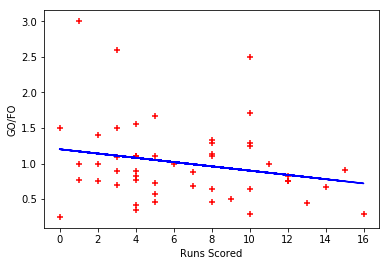

In [43]:
reg = linear_model.LinearRegression()
reg.fit(wu18[['R']], wu18['GO/FO'])

plt.ylabel('GO/FO')
plt.xlabel('Runs Scored')
plt.scatter( wu18['R'],wu18['GO/FO'], color='red', marker='+')
plt.plot(wu18['R'], reg.predict(wu18[['R']]), color='blue')


#### Linear Regression - Option 2

In [49]:
from numpy import *
import scipy
from scipy.interpolate import *
from matplotlib.pyplot import *


In [50]:
p1=polyfit(df['R'],df['RA'],1)

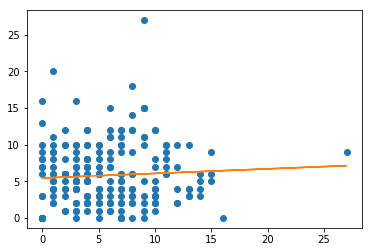

In [51]:
plot(df['R'],df['RA'], 'o')
plot(df['R'], polyval(p1,df['R']))

## Linear Regression Variables for Analysis

In [52]:
wu18_slope, wu18_intercept, wu18_r_value, wu18_p_value, wu18_std_err = scipy.stats.linregress(wu18['R'], wu18['HDP'])
ps18_slope, ps18_intercept, ps18_r_value, ps18_p_value, ps18_std_err = scipy.stats.linregress(ps18['R'], ps18['HDP'])
whit18_slope, whit18_intercept, whit18_r_value, whit18_p_value, whit18_std_err = scipy.stats.linregress(whit18['R'], whit18['HDP'])
lc18_slope, lc18_intercept, lc18_r_value, lc18_p_value, lc18_std_err = scipy.stats.linregress(lc18['R'], lc18['HDP'])
gf18_slope, gf18_intercept, gf18_r_value, gf18_p_value, gf18_std_err = scipy.stats.linregress(gf18['R'], gf18['HDP'])



In [53]:
print('Willamette:',wu18_r_value)
print('Puget Sound:',ps18_r_value)
print('Whitworth:',whit18_r_value)
print('Lewis & Clark:',lc18_r_value)
print('George Fox:',gf18_r_value)

Willamette: -0.15204853800479512
Puget Sound: 0.2536556505843696
Whitworth: 0.3343642052415962
Lewis & Clark: -0.15784129467202987
George Fox: -0.3075998282831655
